In [61]:
import ot
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import time

## Barycentre de 2 sections sous echantillonées

In [28]:
f1=nc.Dataset('sections_as_polylines/ThirdGallery_1_000.nc')
f2=nc.Dataset('sections_as_polylines/ThirdGallery_1_020.nc')

In [29]:
f1.variables.keys()

dict_keys(['__xarray_dataarray_variable__'])

In [36]:
x1=f1.variables['__xarray_dataarray_variable__'][:][::20]
x2=f2.variables['__xarray_dataarray_variable__'][:][::20]

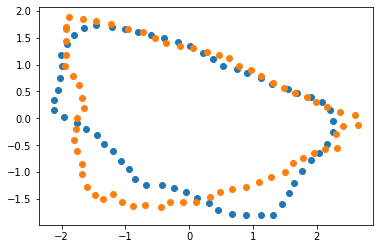

In [37]:
plt.figure()
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])

In [55]:
bary2=ot.bregman.free_support_sinkhorn_barycenter(
        measures_locations=[x1, x2],
        measures_weights=[ot.unif(len(x1)), ot.unif(len(x2))],
        X_init=x1,
        reg=1e-3
    )

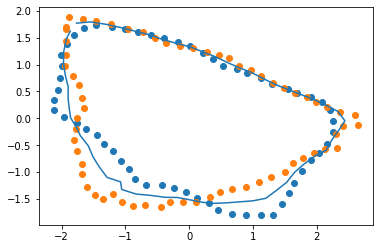

In [56]:
plt.figure()

plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.plot(bary2[:,0],bary2[:,1])

## Barycentre de 100 sections sous echantillonées

In [74]:
import os

X_se=[]

for filename in os.listdir("sections_as_polylines"):
    f=nc.Dataset('sections_as_polylines/'+filename)
    X_se.append(f.variables['__xarray_dataarray_variable__'][:][::20])

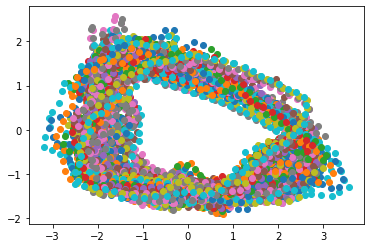

In [75]:
plt.figure()
for i in range(100):
    plt.scatter(X_se[i][:,0],X_se[i][:,1])

In [76]:
m_w_se=[ot.unif(len(X_se[i])) for i in range(100)]

In [78]:
bary100_se=ot.bregman.free_support_sinkhorn_barycenter(
        measures_locations=X_se,
        measures_weights=m_w_se,
        X_init=X_se[0],
        reg=1e-2
    )

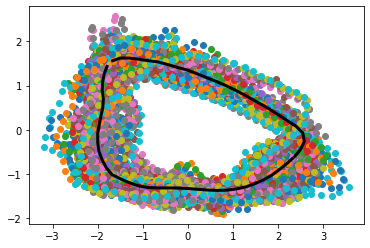

In [54]:
plt.figure()
for i in range(100):
    plt.scatter(X[i][:,0],X[i][:,1])
    
plt.plot(bary100[:,0],bary100[:,1],color='black',linewidth=3)

## Barycentre de 2 sections

In [57]:
x1=f1.variables['__xarray_dataarray_variable__'][:]
x2=f2.variables['__xarray_dataarray_variable__'][:]

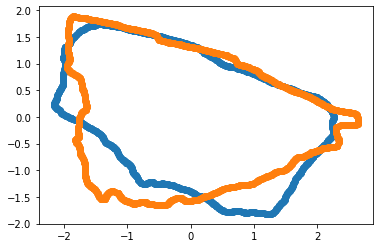

In [58]:
plt.figure()
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])

In [59]:
bary2=ot.bregman.free_support_sinkhorn_barycenter(
        measures_locations=[x1, x2],
        measures_weights=[ot.unif(len(x1)), ot.unif(len(x2))],
        X_init=x1,
        reg=1e-2
    )

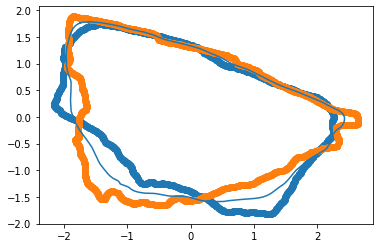

In [60]:
plt.figure()

plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.plot(bary2[:,0],bary2[:,1])

## Barycentre de 100 sections

In [63]:
import os

X_f=[]

for filename in os.listdir("sections_as_polylines"):
    f=nc.Dataset('sections_as_polylines/'+filename)
    X_f.append(f.variables['__xarray_dataarray_variable__'][:])

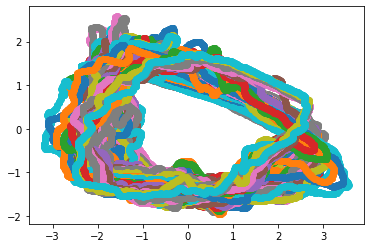

In [64]:
plt.figure()
for i in range(100):
    plt.scatter(X_f[i][:,0],X_f[i][:,1])

In [67]:
m_w_f=[ot.unif(len(X_f[i])) for i in range(100)]

In [68]:
time1=time.time()
bary100=ot.bregman.free_support_sinkhorn_barycenter(
        measures_locations=X_f,
        measures_weights=m_w_f,
        X_init=X_f[0],
        reg=1e-2
    )
time2=time.time()
print(time2-time1)

45578.64474821091


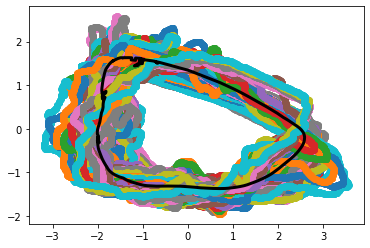

In [69]:
plt.figure()
for i in range(100):
    plt.scatter(X_f[i][:,0],X_f[i][:,1])
plt.plot(bary100[:,0],bary100[:,1],color='black',linewidth=3)

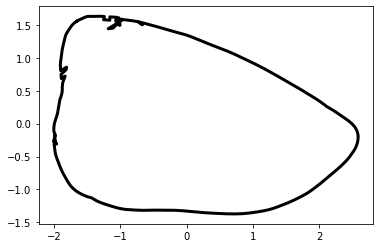

In [73]:
plt.plot(bary100[:,0],bary100[:,1],color='black',linewidth=3)
plt.plot(bary100_se[:,0],bary100_se[:,1],color='black',linewidth=3)